In [50]:
import pandas as pd
import numpy as np 
%matplotlib inline


In [51]:
import requests

def get_census_data(variables = [], state = "", county = "*"):

  census_url = "http://api.census.gov/data/2014/acs5?for=tract:*&in=state:{}+county:{}&get=NAME,{}"
  addr = census_url.format(state, county, ",".join(variables))

  return requests.get(addr).json()


In [52]:
variables = ["B16010_041E", "B16010_001E", "B06012_002E", "B06012_001E", "B21001_002E", "B21001_001E"]
census_resp = get_census_data(state = 17, county = 31, variables = variables)

census_df = pd.DataFrame(data = census_resp[1:], columns = census_resp[0])

census_df["Census Tract"] = census_df["tract"].astype(int)/100.
census_df.set_index("Census Tract", inplace = True)

for v in variables: census_df[v] = census_df[v].astype(int)
census_df["Percent Bachelor's"] = census_df["B16010_041E"] / census_df["B16010_001E"]
census_df["Percent Poverty"]    = census_df["B06012_002E"] / census_df["B06012_001E"]
census_df["Percent Veteren"]    = census_df["B21001_002E"] / census_df["B21001_001E"]
census_df = census_df[["Percent Bachelor's", "Percent Poverty", "Percent Veteren"]]


In [53]:
df_sch_import = pd.read_csv("chicago_schools.csv", index_col = "ISBE_ID")
df_sch_import = df_sch_import[["Name", "PARCC Proficiency (%)", "Grades"]]

df_sch_geocode = pd.read_csv("school_address_geocoded.csv", index_col = "ISBE_ID", usecols = ["ISBE_ID", "CensusTract"])
df_sch_geocode = df_sch_geocode[["CensusTract"]]
df_sch_geocode.rename(columns = {"CensusTract" : "Census Tract"}, inplace = True)

df_sch_merged = df_sch_import.join(df_sch_geocode)
df_sch_merged.dropna(inplace = True)
df_sch_merged.set_index("Census Tract", inplace = True)

In [54]:
census_schools = df_sch_merged.join(census_df)

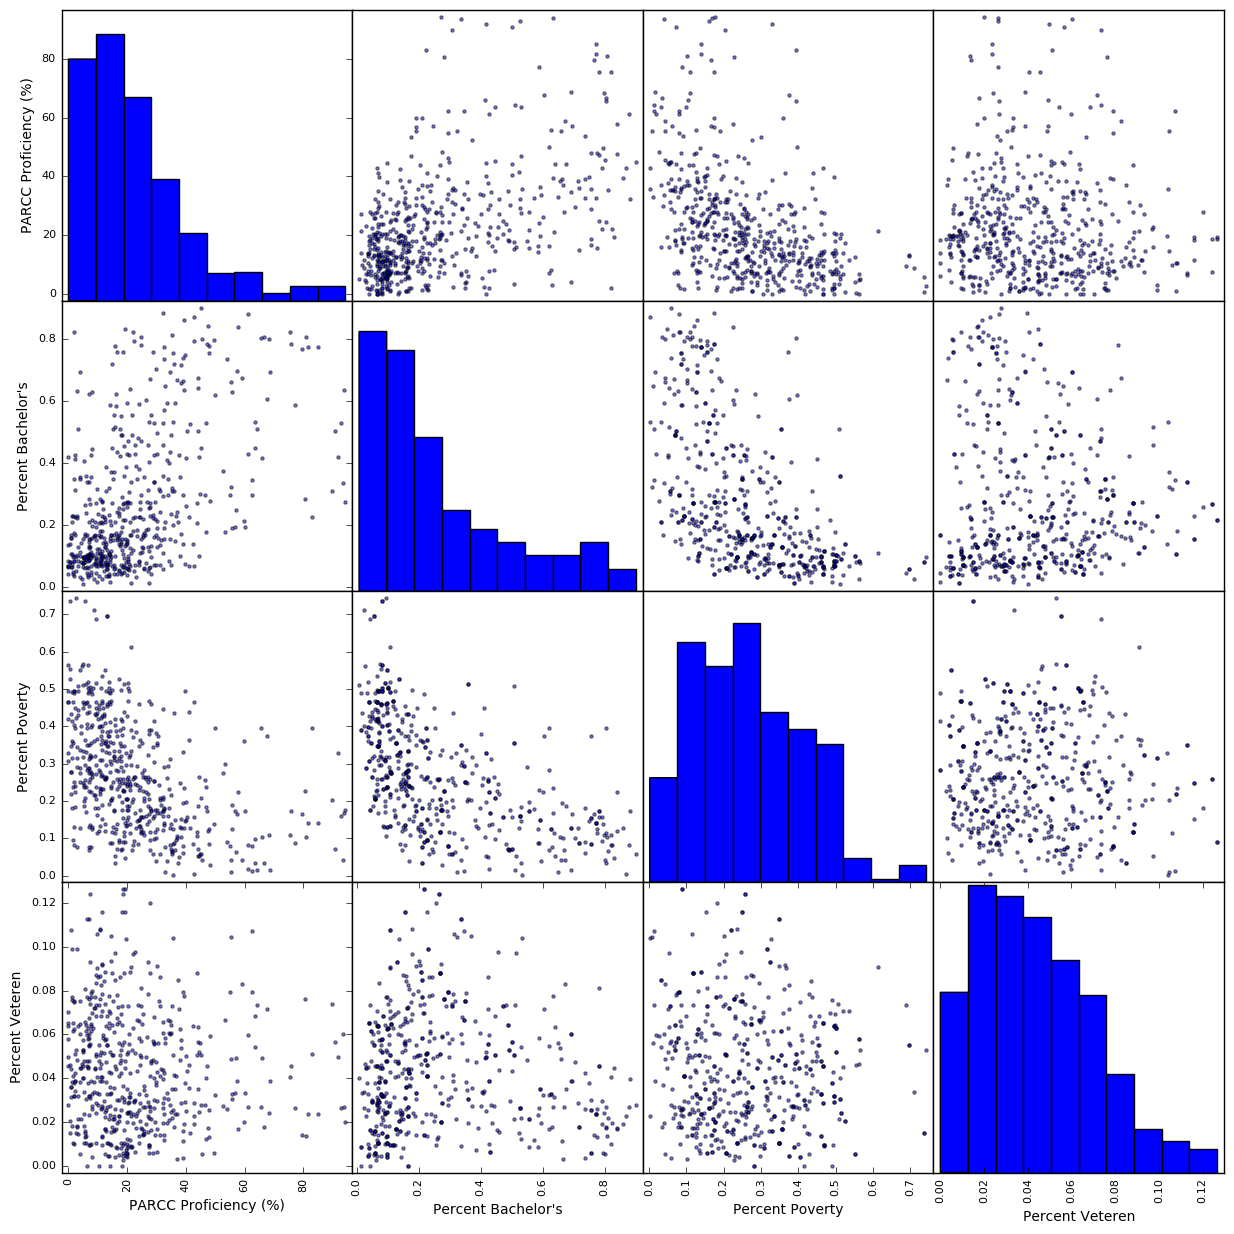

In [55]:
fig = pd.tools.plotting.scatter_matrix(census_schools, figsize = (15, 15))


In [48]:
fig.get_figure().savefig('q6.pdf')


AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'